In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp 
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm import tqdm
import parmap
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.gen_Distribution import *
from TO_sim.For_ensemble.for_221220 import get_tr
from TO_sim.Utility import Create_Folder

In [2]:
DF = 'Review/22.12.27_Identical_w.distribution/'
Create_Folder(DF)

In [3]:
import time

In [28]:
N = 500
seed = 10
dtheta_dist = 'Normal'
Mean = 1
theta_init, omega_init, Kc = Identical(N, 0, seed=seed)

dists = {'Lorentzian\n(Deterministic)':Quantile_Lorentzian,'Normal\n(Deterministic)':Quantile_Normal,
        'Lorentzian':Lorentzian,'Normal':Normal,'Identical':Identical}
_,dtheta_init,_ = dists[dtheta_dist](N,Mean,1,seed=seed)
K = 0.1
m = 3
t_end = 2000
dt = 0.1

In [30]:
Create_Folder(DF+f'phase velocity mean = {Mean}/')

In [31]:
import multiprocessing as mp
import re
core = mp.cpu_count()
resub = re.sub("\n","",dtheta_dist)

In [ ]:
Ks = np.logspace(np.log10(1e-2),np.log10(1),3)


# Ks = np.arange(0.1,1.05,0.1)
ms = np.arange(0,24+0.5/2,0.5)
IDX1 = [K for K in Ks for _ in range(len(ms))]
IDX2 = [m for _ in range(len(Ks)) for m in ms ]
IDX = [IDX1,IDX2]
df = pd.DataFrame(np.random.rand(len(Ks)*len(ms),2), index=IDX,columns=['t','r'],dtype=object)
seed = 10
initial_frequecny = 0
for K in tqdm(Ks):
    for m,(df.loc[K,m].t,df.loc[K,m].r) in zip(ms,parmap.map(get_tr,ms,t_end=t_end,K=K,seed=seed,initial_speed=initial_frequecny,dtheta_init = dtheta_init,pm_processes=core,pm_pbar=False)):pass

In [44]:
ms = np.arange(0,24+0.1/2,0.1)
ts = {}
rs = {}
seed = 10
initial_frequecny = 0
K = 0.1

dtheta_dist = 'Normal\n(Deterministic)'
theta_init, omega_init, Kc = Identical(N, 0, seed=seed)
resub = re.sub("\n","",dtheta_dist)
dists = {'Lorentzian\n(Deterministic)':Quantile_Lorentzian,'Normal\n(Deterministic)':Quantile_Normal,
        'Lorentzian':Lorentzian,'Normal':Normal,'Identical':Identical}
_,dtheta_init,_ = dists[dtheta_dist](N,Mean,1,seed=seed)

np.random.seed(10)
np.random.shuffle(dtheta_init)
for m,(ts[m],rs[m]) in zip(ms,parmap.map(get_tr,ms,K=K,seed=seed,initial_speed=initial_frequecny,dtheta_init=dtheta_init,pm_processes=core,pm_pbar=True)):pass

  0%|          | 0/241 [00:00<?, ?it/s]

In [45]:
np.mean(dtheta_init)

1.0

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_27186/334363304.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


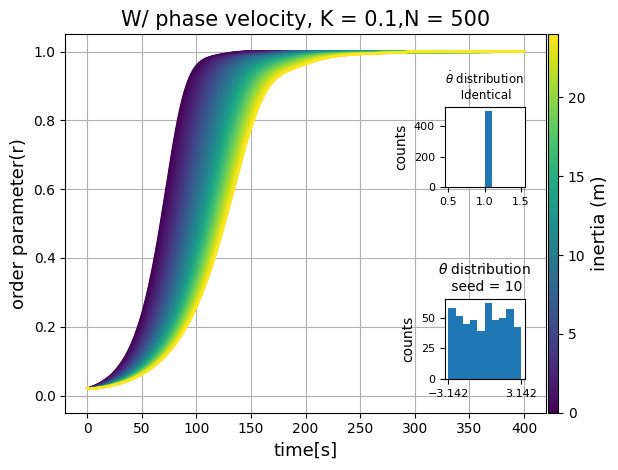

In [46]:
fig = plt.figure(facecolor='white')
ax1 = plt.subplot(111)
color_idx = np.linspace(0.0,1,len(ms))
color = plt.cm.viridis(color_idx)
sca = plt.scatter(0*ms,0*ms,s=0,c=ms)
for i,(t,r) in enumerate(zip(ts.values(),rs.values())):
    plt.plot(t,r,color=color[i],alpha=1)
# plt.xscale('log')
plt.yscale('log')
plt.title(f'W/ phase velocity, K = {K},N = {N}',fontsize=15)
plt.grid()
plt.xlabel('time[s]',fontsize=13)
plt.ylabel('order parameter(r)',fontsize=13)
fig.add_axes([0.72, 0.2, 1/8, 1/6]) 
plt.hist(theta_init)
plt.xticks([-np.pi,np.pi])
plt.title(r'$\theta$ distribution'+f'\n seed = {seed}',fontsize=10)
plt.ylabel('counts')
plt.tick_params(labelsize=8)

ax=fig.add_axes([0.72, 0.6, 1/8, 1/6]) 
ax.set_facecolor('white')
plt.hist(dtheta_init)
plt.title(r'$\dot{\theta}$ distribution'+f'\n {dtheta_dist}',fontsize=8.5)
plt.ylabel('counts')
plt.tick_params(labelsize=8)

divider3 = make_axes_locatable(ax1)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar = fig.colorbar(sca, cax=cax)
cbar.set_label('inertia (m)',fontsize=13)
plt.tight_layout()
# plt.savefig(DF+f'{resub} K = {K} Identical oscillator linear-log with phase velocity seed = {seed} m = [{ms[0],ms[-1]}].png',dpi=400)
ax1.set_yscale('linear')
# plt.savefig(DF+f'{resub} K = {K} Identical oscillator with phase velocity seed = {seed} m = [{ms[0],ms[-1]}].png',dpi=400)
# plt.scatter(np.sin(theta_init[::]),np.cos(theta_init[::]),alpha=0.5,s=5)


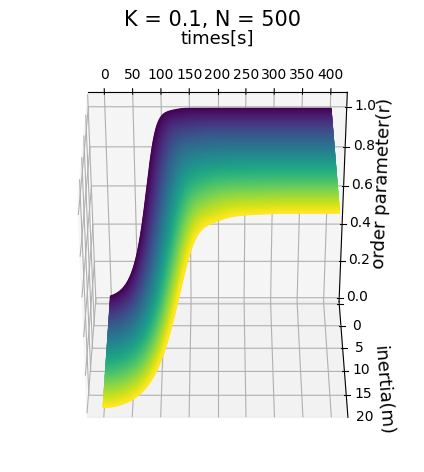

In [47]:
plt.subplot(projection='3d')
for i,(t,r) in enumerate(zip(ts.values(),rs.values())):
    plt.plot(t,r,zs=ms[i],color=color[i],alpha=1)
ax = plt.gca()
ax.view_init(elev = 125,azim = -90)
ax.set_xlabel('times[s]',fontsize = 13)
ax.set_ylabel('order parameter(r)',fontsize = 13)
ax.set_zlabel('inertia(m)',fontsize= 13)
ax.set_title(f'K = {K}, N = {N}',y=1.15,fontsize=15)
ax.set_ylim(0,)
ax.set_zlim(0,)
plt.tight_layout()
# plt.savefig(DF+f'3D {resub} K = {K} Identical oscillator without phase velocity seed = {seed} m = [{ms[0],ms[-1]}].png',dpi=400)


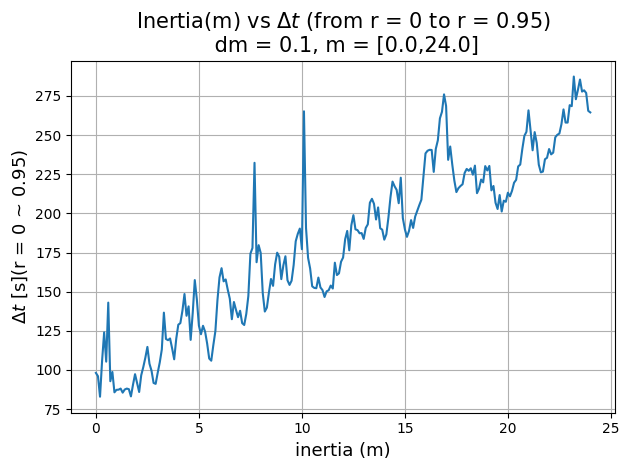

In [27]:
t_01_09 = []
for m,t,r in zip(ms,ts.values(),rs.values()):
    idx = np.searchsorted(r,0.95)
    t_01_09.append(t[idx])

plt.plot(ms,t_01_09)
ax1 = plt.gca()
ax1.grid()
ax1.set_xlabel('inertia (m)',fontsize=13)
ax1.set_ylabel('$\Delta t$ [s](r = 0 ~ 0.95)',fontsize=13)
ax1.set_title('Inertia(m) vs $\Delta t$ (from r = 0 to r = 0.95)'+f'\n dm = 0.1, m = [{ms[0]},{ms[-1]}]',fontsize=15)
plt.tight_layout()

plt.savefig(DF + f'{resub} simulation K m vs delta t 095.png',dpi=400)
# plt.savefig(DF+f'Inertia vs Duration dm = 0.1, m = [{ms[0]},{ms[-1]}].png',dpi=400)

In [82]:
from matplotlib.collections import PolyCollection

In [86]:
def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]

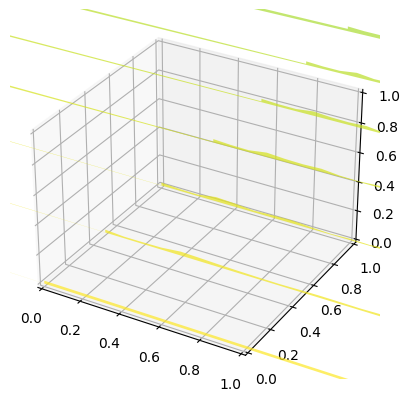

In [92]:
verts = [polygon_under_graph(t, r)
         for t,r in zip(ts.values(),rs.values())]
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)

ax =plt.subplot(projection='3d')
ax.add_collection3d(poly, zs=ts., zdir='y')
